## Distribution of firm size firms

-------------------------

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

pd.options.display.max_colwidth = 200
pd.set_option('display.max_columns', None)

### Load Compustat data

In [2]:
df= pd.read_csv("compustat_from_1990.csv")
df['sic1']= (df['sich']/1000).astype(int).astype(str)
df=df[['conm', 'gvkey', 'tic', 'fyear', 'at', 'ni', 'sale', 'mv', 'sic1']]
df['lag_at']= df.groupby('gvkey')['at'].shift(1)
df['ROA']= df['ni'] / df['lag_at']
print(df.shape)
df.head()

(211966, 11)


conm  gvkey  tic  fyear       at      ni     sale          mv sic1  \
0  AAR CORP   1004  AIR   1990  379.958  14.801  466.542  224.460360    5   
1  AAR CORP   1004  AIR   1991  395.351  10.020  422.657  204.699595    5   
2  AAR CORP   1004  AIR   1992  365.151   0.283  382.780  214.663477    5   
3  AAR CORP   1004  AIR   1993  417.626   9.494  407.754  228.648720    5   
4  AAR CORP   1004  AIR   1994  425.814  10.463  451.395  243.405235    5   

    lag_at       ROA  
0      NaN       NaN  
1  379.958  0.026371  
2  395.351  0.000716  
3  365.151  0.026000  
4  417.626  0.025054

In [3]:
df.dropna(inplace=True)
df= df[df['ROA'].abs()<0.5]
df= df[df['sale']>0]
df= df[df['at']>0]
df= df[df['mv']>0]
df.shape

(143040, 11)

In [4]:
balance_boolean= df.groupby('gvkey').agg({'gvkey':'count', 'sic1':'nunique'}).rename(columns={'gvkey':'N', 'sic1':'ind_count'}).reset_index()
balance_boolean.head()

gvkey   N  ind_count
0   1004  30          1
1   1009   4          1
2   1011   4          1
3   1013  19          1
4   1017   4          1

In [5]:
balance_boolean= balance_boolean[balance_boolean['ind_count']==1]
balance_gvkeys= balance_boolean[balance_boolean['N']==balance_boolean['N'].max()]
balance_gvkeys.shape

(584, 3)

In [6]:
gvkey_list= list(balance_gvkeys['gvkey'])
len(gvkey_list)

584

In [7]:
df= df[df.gvkey.isin(gvkey_list)]
df.shape

(17520, 11)

In [8]:
df_2020= df[df.fyear==2020]
gvkey_100_list= list(df_2020.sort_values('mv', ascending= False).head(100)['gvkey'])
df=df[df.gvkey.isin(gvkey_100_list)]
df.shape

(3000, 11)

In [9]:
df['size']= df['mv'].clip(df['mv'].quantile(0.3),)

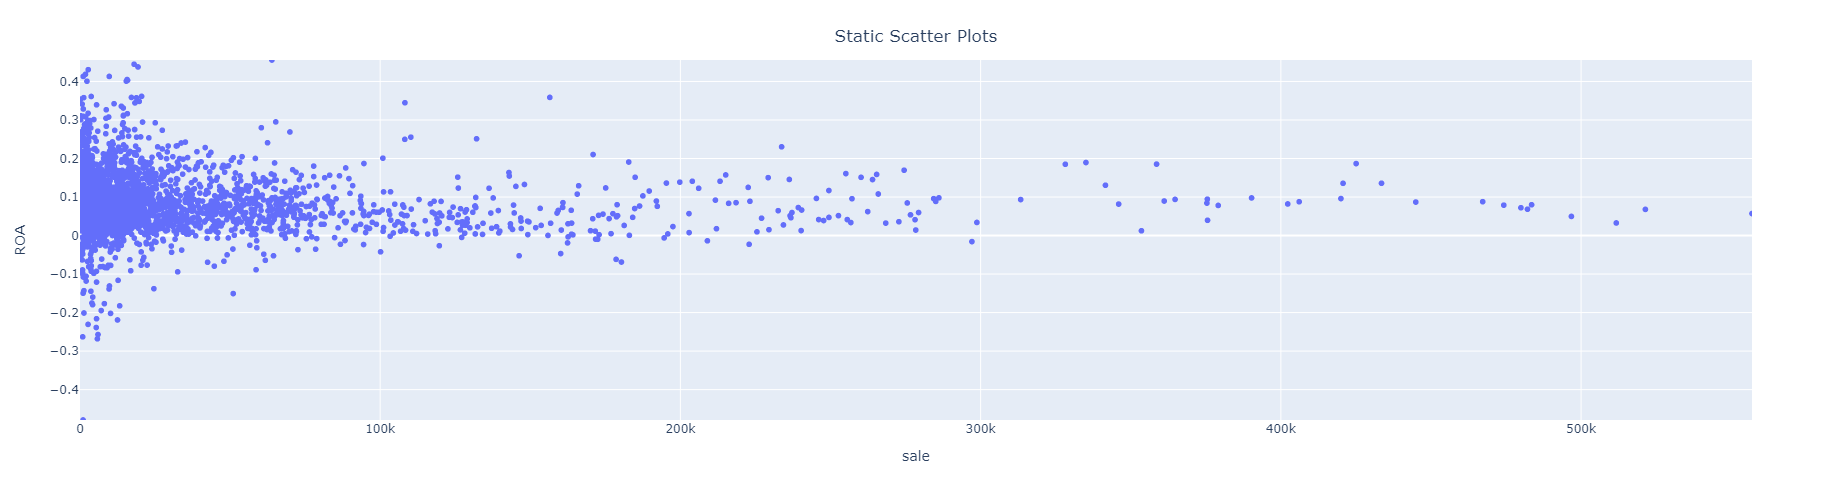

In [19]:
fig=px.scatter(df, x='sale', y='ROA',
              height= 500, width= 1000,
              range_x=[min(df['sale']), max(df['sale'])],
              range_y=[min(df['ROA']), max(df['ROA'])]
              )

fig.update_layout(
    title={
        'text': "Static Scatter Plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

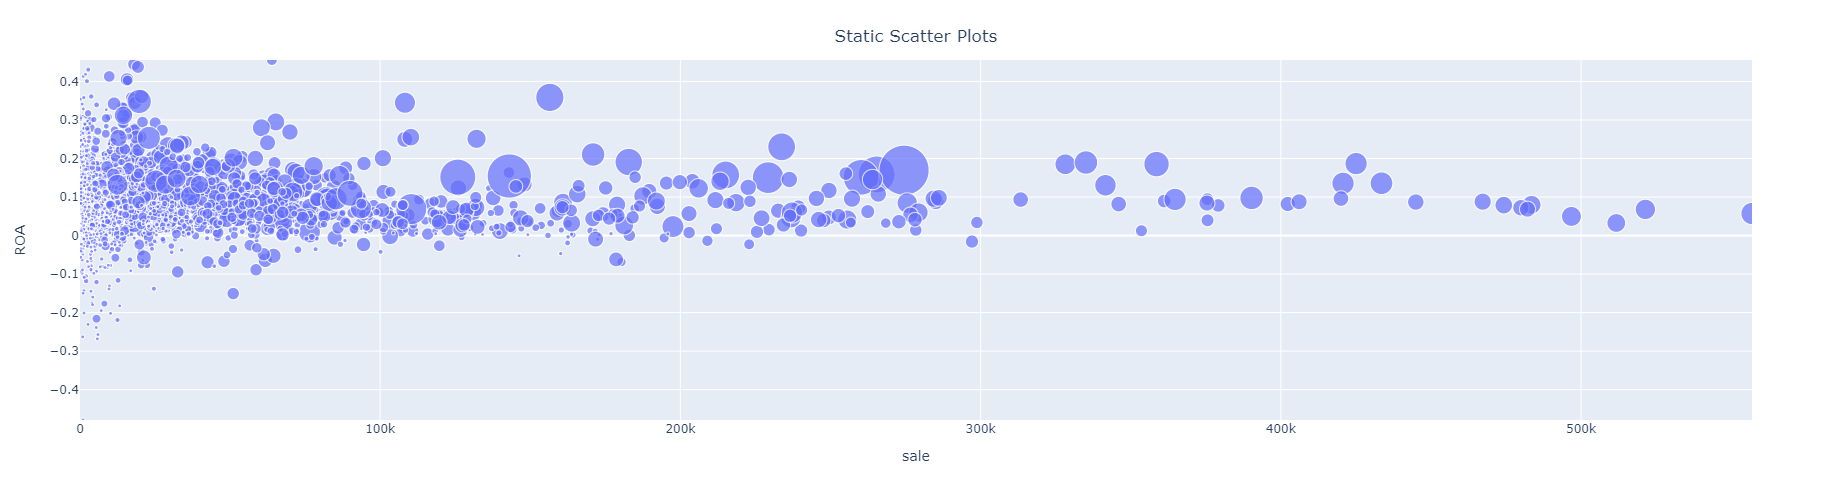

In [10]:
fig=px.scatter(df, x='sale', y='ROA',
              height= 500, width= 1000,
              range_x=[min(df['sale']), max(df['sale'])],
              range_y=[min(df['ROA']), max(df['ROA'])],
               size='size', 
               size_max= 50,
#                log_x= True
              )

fig.update_layout(
    title={
        'text': "Static Scatter Plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

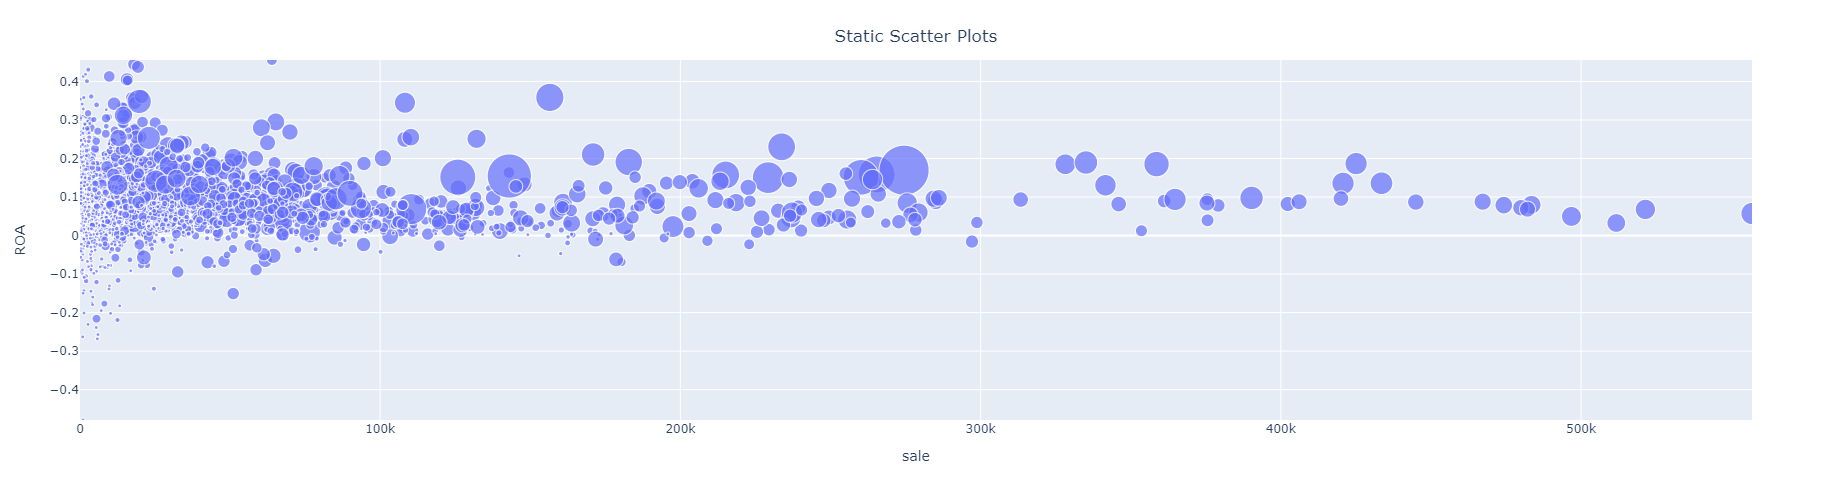

In [11]:
fig=px.scatter(df, x='sale', y='ROA',
              height= 500, width= 1000,
              range_x=[min(df['sale']), max(df['sale'])],
              range_y=[min(df['ROA']), max(df['ROA'])],
               size='size', 
               size_max= 50,
#                log_x= True,
              hover_name= 'conm')

fig.update_layout(
    title={
        'text': "Static Scatter Plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

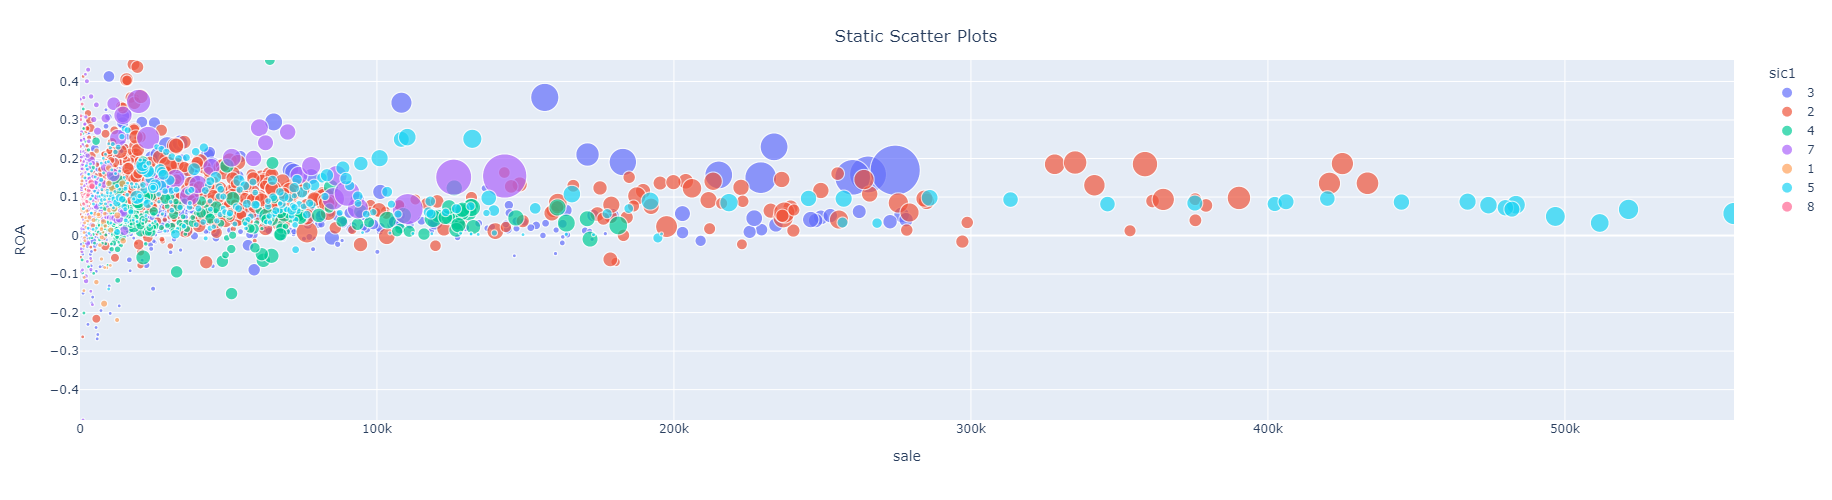

In [12]:
fig=px.scatter(df, x='sale', y='ROA',
              height= 500, width= 1000,
              range_x=[min(df['sale']), max(df['sale'])],
              range_y=[min(df['ROA']), max(df['ROA'])],
               size='size', 
               size_max= 50,
#                log_x= True,
               color='sic1',
              hover_name= 'conm')

fig.update_layout(
    title={
        'text': "Static Scatter Plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [13]:
fig.write_html('static_plot.html')

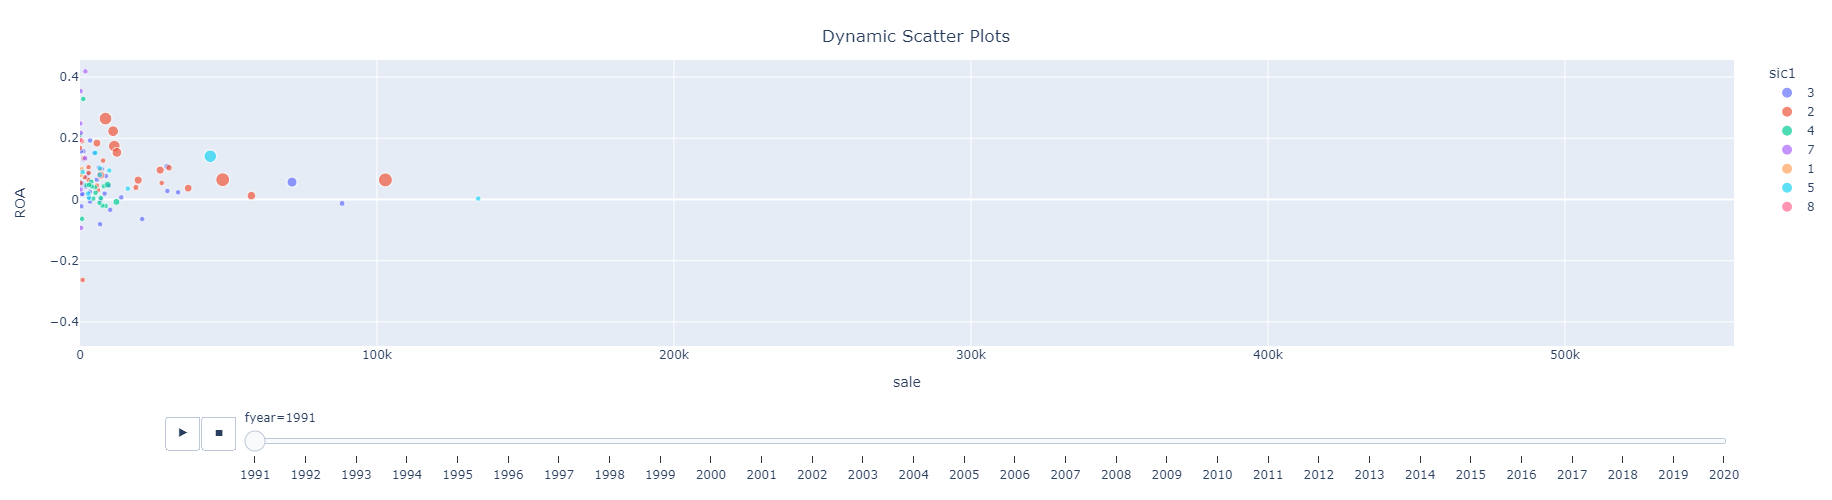

In [14]:
fig=px.scatter(df, x='sale', y='ROA',
              animation_frame='fyear',
              animation_group='conm',
              height= 500, width= 1000,
              range_x=[min(df['sale']), max(df['sale'])],
              range_y=[min(df['ROA']), max(df['ROA'])],
               size='size', 
               size_max= 50,
#                log_x= True,
               color='sic1',
              hover_name= 'conm'
              )

fig.update_layout(
    title={
        'text': "Dynamic Scatter Plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [15]:
fig.write_html('dynamic_plot.html')

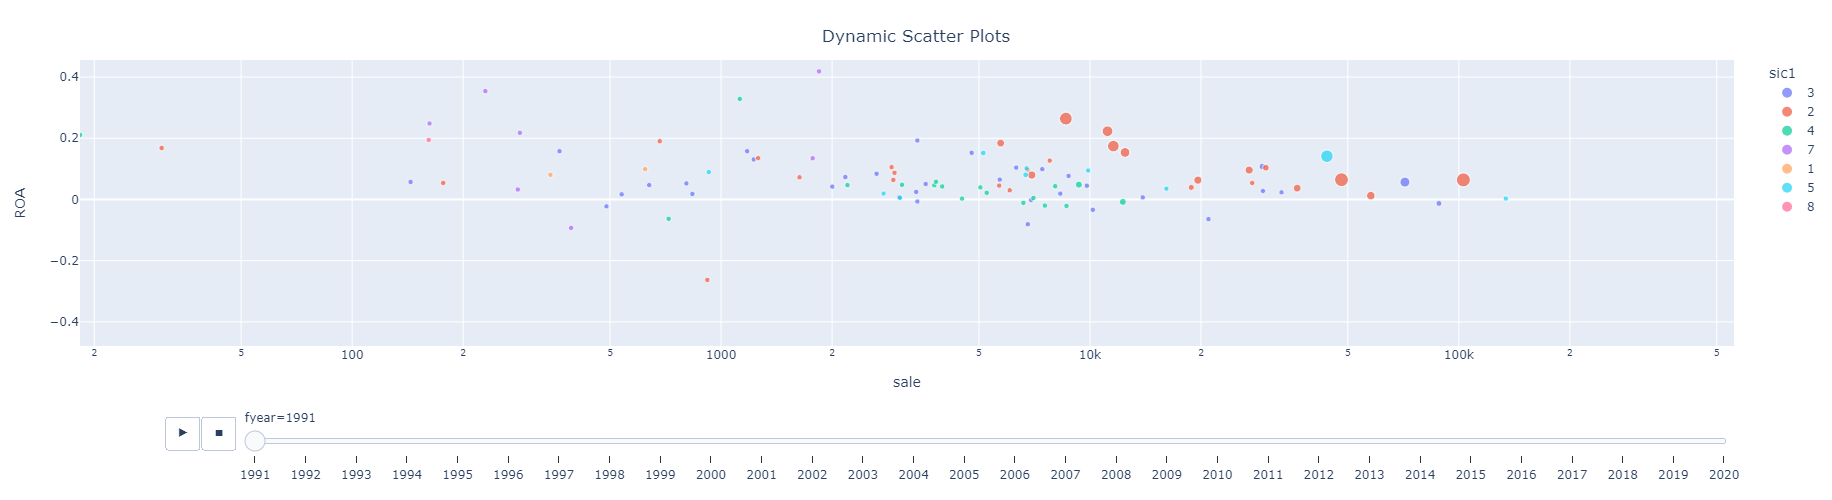

In [16]:
fig=px.scatter(df, x='sale', y='ROA',
              animation_frame='fyear',
              animation_group='conm',
              height= 500, width= 1000,
              range_x=[min(df['sale']), max(df['sale'])],
              range_y=[min(df['ROA']), max(df['ROA'])],
               size='size', 
               size_max= 50,
               log_x= True,
               color='sic1',
              hover_name= 'conm'
              )

fig.update_layout(
    title={
        'text': "Dynamic Scatter Plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()